<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week4/Wine_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import pandas as pd
import numpy as np


# 1. 데이터 준비
white_df = pd.read_csv("/content/drive/MyDrive/winequality-white.csv", sep=';').dropna()
red_df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=';').dropna()


# 두 데이터셋 병합
df = pd.concat([red_wine, white_wine], ignore_index=True)

X = df.drop('quality', axis=1)
y = df['quality']

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [49]:
from tensorflow.keras import layers, models
#스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:

#원-핫 인코딩
y = y.astype('category') # 이 라인을 추가하여 y의 타입을 category로 변환
Y = pd.get_dummies(y).values

In [51]:
#테스트 나누기 . validation으로는 안나눔
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [52]:
# input이 feature의 수임. X.shape[1]의 뜻은?
## Y.shape[1] 은 출력층이라서 클래스의 최종 개수임.
## 입력층, 출력층 의 개수가 중요.
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X.shape[1],)),  # 뉴런 수 증가
    layers.Dropout(0.3),  # 드롭아웃 추가 (30%의 뉴런을 랜덤하게 끔)
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),  # 드롭아웃 추가
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
## 컴파일

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [54]:
# 학습

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4430 - loss: 1.4453 - val_accuracy: 0.5365 - val_loss: 1.1192
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5235 - loss: 1.1412 - val_accuracy: 0.5538 - val_loss: 1.0866
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5573 - loss: 1.0643 - val_accuracy: 0.5423 - val_loss: 1.0712
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5514 - loss: 1.0842 - val_accuracy: 0.5567 - val_loss: 1.0692
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5387 - loss: 1.0661 - val_accuracy: 0.5750 - val_loss: 1.0452
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5611 - loss: 1.0430 - val_accuracy: 0.5452 - val_loss: 1.0561
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5559 - loss: 1.0365 - val_accuracy: 0.5740 - val_loss: 1.0370
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5690 - loss: 1.0250 - val_accuracy: 0.

In [55]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


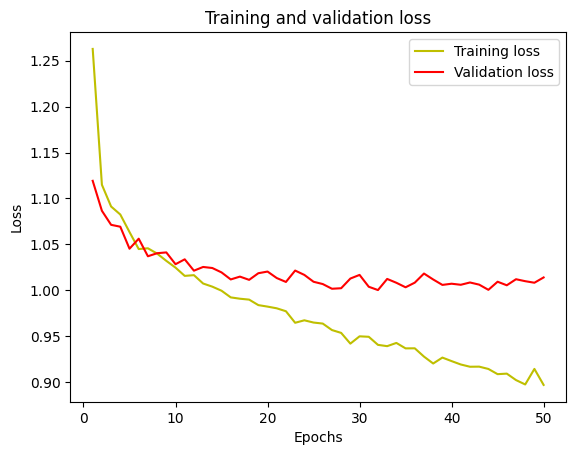

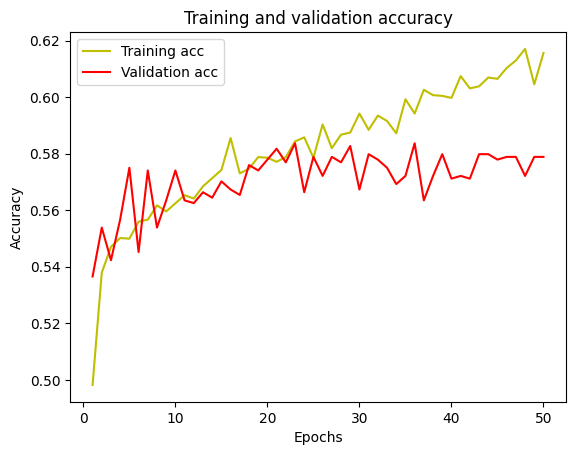

In [57]:
# 그래프 그려주는 것
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
# 결과 출력

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.43      0.06      0.11        48
           2       0.62      0.64      0.63       413
           3       0.57      0.73      0.64       579
           4       0.54      0.32      0.40       211
           5       0.83      0.12      0.21        41
           6       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.43      0.27      0.28      1300
weighted avg       0.58      0.58      0.56      1300

[[  0   2   4   1   0   0   0]
 [  0   3  36   9   0   0   0]
 [  0   2 263 147   1   0   0]
 [  0   0 118 422  38   1   0]
 [  0   0   6 138  67   0   0]
 [  0   0   0  18  18   5   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
# 손실 그래프을 보면, epoch수가 늘어남에따라 0으로 가까워지고 있고, 학습이 제대로 진행됨을 알 수 있음.
# 정확도 그래프 또한 83~86% 로 훌륭한 성능을 가지고 있고, 두 정확도 곡선이 거의 일치함에 따라
# 훈련데이터 뿐만아니라, 검증데이터(처음보는 데이터)에도 비슷한 성능을 보여줌을 알 수 있음.
# 성능을 높이기 위해서 하이퍼파라미터 튜닝을 시도해볼 수 있음.